# Primer Proyecto

**BASE DE DATOS ESCOGIDA:** Airbnb de Seattle + Airbnb de Boston


Se realiza el cargue de la base de datos, así como los principales módulos a emplear

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.12f}'.format

# Seattle
df1 = pd.read_csv('https://raw.githubusercontent.com/jdiazbeta/00_DataSciente_Proj_Rep/main/listings.csv')
# Boston
df2 = pd.read_csv('https://raw.githubusercontent.com/jdiazbeta/00_DataSciente_Proj_Rep/main/listings_BOS.csv')

display(df1.head(2))
display(df2.head(2))
print(df1.shape)
print(df2.shape)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.000000000000,f,NaN,WASHINGTON,f,moderate,f,f,2,4.070000000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.000000000000,f,NaN,WASHINGTON,f,strict,t,t,6,1.480000000000


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.000000000000,f,NaN,NaN,t,moderate,f,f,1,1.300000000000


(3818, 92)
(3585, 95)


In [18]:
# Concatenando las bases de datos
columnas_estr = df1.columns.intersection(df2.columns)

# Filtrar ambos DataFrames para mantener solo las columnas comunes
df1_common = df1[columnas_estr]
df2_common = df2[columnas_estr]

# Ajuste de ciudad aprovechando ...
df1_common['city'] = "Seattle"
df2_common['city'] = "Boston"

# Concatenar los DataFrames filtrados
df = pd.concat([df1_common, df2_common])

<ipython-input-18-0438a7beb5b8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_common['city'] = "Boston"


In [19]:
# Depuracion inicial de columnas
base = df.loc[:, ~df.columns.str.contains("url")]  # Omitir columnas con links
base.shape

(7403, 84)

In [20]:
# base.info()

In [21]:
base.head()

,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,...,10.000000000000,f,NaN,WASHINGTON,f,moderate,f,f,2,4.070000000000
1,953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,...,10.000000000000,f,NaN,WASHINGTON,f,strict,t,t,6,1.480000000000
2,3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,...,10.000000000000,f,NaN,WASHINGTON,f,strict,f,f,2,1.150000000000
3,7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,...,9.000000000000,f,NaN,WASHINGTON,f,strict,f,f,1,0.890000000000


## Identificando faltantes por columna

In [22]:
trec1_faltantes = np.sum(df.isnull()).to_frame().reset_index().sort_values(0, ascending=False)
trec1_faltantes.columns = ['columna','total_faltantes']
trec1_faltantes["prop"] = trec1_faltantes['total_faltantes']/df.shape[0]
print(trec1_faltantes)

print("Total de columnas sin valores faltantes: ", trec1_faltantes[trec1_faltantes['prop'] == 0].shape[0])
print("Total de columnas con menos del 50% de valores faltantes: ", trec1_faltantes[(trec1_faltantes['prop'] > 0) & (trec1_faltantes['prop'] < 0.5)].shape[0])
print("Total de columnas con mas del 50% de valores faltantes: ", trec1_faltantes[trec1_faltantes['prop'] >= 0.5].shape[0])
print("Total de columnas con mas del 75% de valores faltantes: ", trec1_faltantes[trec1_faltantes['prop'] >= 0.75].shape[0])

             columna  total_faltantes           prop
84           license             7403 1.000000000000
56       square_feet             7250 0.979332702958
59     monthly_price             4998 0.675131703364
58      weekly_price             4502 0.608131838444
60  security_deposit             4195 0.566662163988
..               ...              ...            ...
54          bed_type                0 0.000000000000
55         amenities                0 0.000000000000
57             price                0 0.000000000000
62   guests_included                0 0.000000000000
46         longitude                0 0.000000000000

[92 rows x 3 columns]
Total de columnas sin valores faltantes:  42
Total de columnas con menos del 50% de valores faltantes:  45
Total de columnas con mas del 50% de valores faltantes:  5
Total de columnas con mas del 75% de valores faltantes:  2


Teniendo un panorama general de la cantidad de columnas existentes en la base y su descripción, así como cantidad de faltantes por columna y proporción respectivamente, para la solución de cada pregunta de interés a resolver se crearán y realizarán sub bases con la información necesaria.

## 1. Revision de calificaciones de huespedes por lugar geográfico
En que ciudades, existentes en la base, tienden a ser mayores las calificaciones dadas por los huespedes? ¿Son significativamente diferentes unas de otras? Es decir, ¿Hay ciudades con calificaciones muy por debajo o por encima en algun área evaluada en concreto?

Se plantea la pregunta para dar a conocer si, dependiendo potencialmente de la ciudad del anfitrión, la calificaciones dadas por los huespedes en la experiencia tienden a aumentar o disminuir, y si este comportamiento puede deberse a un ítem en particular. Con ello se puede plantear potenciales mejoras en aspectos específicos en casos donde las calificaciones promedio o medias sean bajas en comparación a otras ciudades.

In [23]:
p1_calificaciones = base.filter(regex='city|number_of_reviews|.*review_scores.*')
display(p1_calificaciones.head())
print(p1_calificaciones.shape)

,city,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Seattle,207,95.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000
1,Seattle,43,96.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
2,Seattle,20,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
3,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Seattle,38,92.000000000000,9.000000000000,9.000000000000,10.000000000000,10.000000000000,9.000000000000,9.000000000000


(7403, 9)


In [24]:
p1_calificaciones['city'].value_counts()

city
Seattle    3818
Boston     3585
Name: count, dtype: int64

Existen registros donde no hay ningún tipo de calificación. Esto dado que no presentan a la fecha alguna reseña. Para la calidad del ejercicio estos registros se omitirán de la base de datos para así atender a la pregunta.

In [25]:
p1_calificaciones = p1_calificaciones[p1_calificaciones['city'] != 0]
display(p1_calificaciones.head())
print(p1_calificaciones.shape)

,city,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Seattle,207,95.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000
1,Seattle,43,96.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
2,Seattle,20,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
3,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Seattle,38,92.000000000000,9.000000000000,9.000000000000,10.000000000000,10.000000000000,9.000000000000,9.000000000000


(7403, 9)


Nueva revisión de valores faltantes

In [26]:
trec2_faltantes = np.sum(p1_calificaciones.isnull()).to_frame().reset_index().sort_values(0, ascending=False)
trec2_faltantes.columns = ['columna','total_faltantes']
trec2_faltantes["prop"] = trec2_faltantes['total_faltantes']/p1_calificaciones.shape[0]
print(trec2_faltantes)

                       columna  total_faltantes           prop
3       review_scores_accuracy             1481 0.200054032149
5        review_scores_checkin             1478 0.199648791031
7       review_scores_location             1477 0.199513710658
8          review_scores_value             1477 0.199513710658
4    review_scores_cleanliness             1471 0.198703228421
6  review_scores_communication             1469 0.198433067675
2         review_scores_rating             1460 0.197217344320
0                         city                0 0.000000000000
1            number_of_reviews                0 0.000000000000


In [27]:
p1_calificaciones[p1_calificaciones.isnull().any(axis=1)].head(10)

,city,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
3,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Seattle,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dado que aun se presentan valores faltantes en la base de datos, pero estos son menos del 1% se realizará la imputación por mediana (esto dado que es una medida mas robusta en comparación al promedio).

Ahora, la imputación se realizará posterior a la omisión de registros donde no se evidencia ninguna calificación, es decir, que el total de faltantes de la base es igual a 7.

In [28]:
# p1_calificaciones['faltantes'] = p1_calificaciones.isnull().sum(axis=1)
p1_calificaciones = p1_calificaciones[p1_calificaciones.isnull().sum(axis=1) != 7]
display(p1_calificaciones.head())
print(p1_calificaciones.shape)

,city,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Seattle,207,95.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000
1,Seattle,43,96.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
2,Seattle,20,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
4,Seattle,38,92.000000000000,9.000000000000,9.000000000000,10.000000000000,10.000000000000,9.000000000000,9.000000000000
5,Seattle,17,95.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000


(5944, 9)


In [29]:
# Imputación por mediana
for col in p1_calificaciones.select_dtypes(include=['float', 'int']).columns:
        p1_calificaciones[col].fillna((p1_calificaciones[col].median()), inplace=True)

p1_calificaciones.isnull().sum(axis=0)

city                           0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

Para mayor adaptabilidad, y dado que las calificaciones estan en diferente escala, se realizará la homologacion, haciendo que todas vayan de 0 a 100:
- Para las calificaciones de 0 a 100 se dejará tal cual
- Para las calificaciones de 0 a 10 se multiplicará por 10 dada su proporcionalidad

In [30]:
cal_var = ["review_scores_accuracy",	"review_scores_cleanliness",	"review_scores_checkin",
           "review_scores_communication",	"review_scores_location",	"review_scores_value"]

for col in cal_var:
        p1_calificaciones[col] *= 10

p1_calificaciones.head()

,city,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Seattle,207,95.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000,90.000000000000,100.000000000000
1,Seattle,43,96.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000
2,Seattle,20,97.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000
4,Seattle,38,92.000000000000,90.000000000000,90.000000000000,100.000000000000,100.000000000000,90.000000000000,90.000000000000
5,Seattle,17,95.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000,100.000000000000


In [31]:
p1_calificaciones['city'] = p1_calificaciones['city'].str.lstrip().str.lower()
p1_calificaciones['city'] = p1_calificaciones['city'].str.rstrip()

trec3_coparativos = p1_calificaciones.groupby('city')[["number_of_reviews",	"review_scores_rating",	"review_scores_accuracy",	"review_scores_cleanliness",
                                   "review_scores_checkin",	"review_scores_communication",	"review_scores_location",	"review_scores_value"]].mean()

In [32]:
trec3_coparativos

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
city,,,,,,,,
boston,24.598269022719,91.918139199423,94.338261810314,92.596465921385,96.473133790119,96.473133790119,94.161557879553,91.676884240894
seattle,26.751497950173,94.539262062441,96.376537369915,95.572374645222,97.874487543362,98.098391674551,96.099022390413,94.509618416903


<Axes: xlabel='city'>

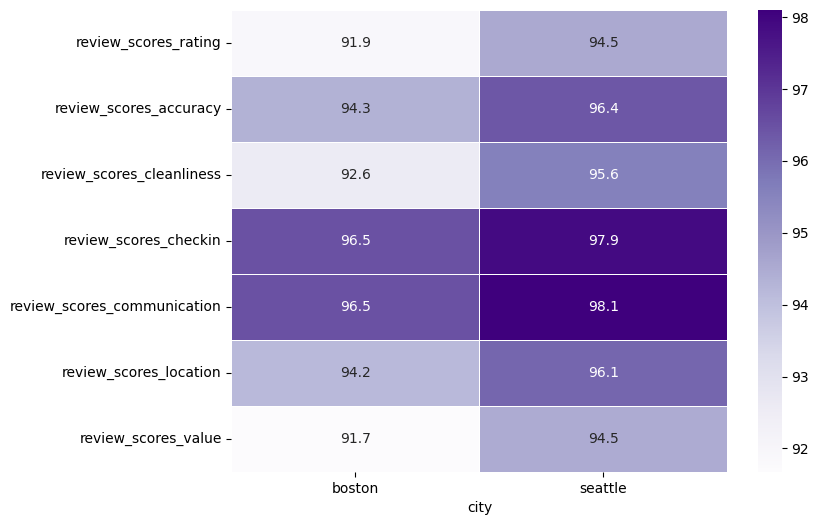

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(trec3_coparativos.filter(regex='city|.*review_scores.*').T,
            annot=True,
            cmap='Purples',
            linewidths=.5,
            fmt='.1f')

Revisando los resultados, se lelgan a las siguientes observaciones:

En primer lugar, los alojamientos de Seattle presentan mejores calificaciones a nivel general en todas las calificaciones dadas por los huespedes en cada uno de los items analizados.

Los alojamientos de Seattle presentan calificaciones mas bajas en aspectos de precio vs calidad y puntuación general del alojamiento por opiniones de huespedes. El tercer aspecto con menor calificación es la limpieza del alojamiento. Por otra parte, los mejores aspectos de los alojamientos en Seattle radican en la percepción de la comunicación y registro.

Boston presenta conclusiones similares, sin embargo sus calificaciones son mas bajas en todos los items en comparación a Seattle como se menciono inicialmente, por lo que los alojamientos en esta ciudad deben trabajar en cada uno de estos items para mejorar la experiencia del huesped.

## 2. Estimación del precio
Es de interés particular determinar bases con las que puede definirse el precio de un alojamiento. Se tomarán inicialmente características que inicialmente se piensa repercuten en el valor del alojamiento, o a lo mucho que podrían hacerlo. Estas características escogidas describen en escencia el lugar y características del alojamiento, así como la percepción del mismo de parte de anteriores huespedes en caso de tener historia.

Con estas características ¿Que tan preciso es la estimación del precio?

Inicialmente se subtraerán dichas caracteristicas de interés y se depurará la base de datos de acuerdo a las variables. Se realizarán procesos de ajuste de formatos e imputación de faltantes dado el caso.

In [34]:
base_modelo = base[['price', 'city', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
                    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

base_modelo.head()

,price,city,property_type,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,$85.00,Seattle,Apartment,4,1.000000000000,1.000000000000,1.000000000000,2,1,365,207,95.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000
1,$150.00,Seattle,Apartment,4,1.000000000000,1.000000000000,1.000000000000,1,2,90,43,96.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
2,$975.00,Seattle,House,11,4.500000000000,5.000000000000,7.000000000000,10,4,30,20,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
3,$100.00,Seattle,Apartment,3,1.000000000000,0.000000000000,2.000000000000,1,1,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$450.00,Seattle,House,6,2.000000000000,3.000000000000,3.000000000000,6,1,1125,38,92.000000000000,9.000000000000,9.000000000000,10.000000000000,10.000000000000,9.000000000000,9.000000000000


In [35]:
base_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7403 entries, 0 to 3584
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        7403 non-null   object 
 1   city                         7403 non-null   object 
 2   property_type                7399 non-null   object 
 3   accommodates                 7403 non-null   int64  
 4   bathrooms                    7373 non-null   float64
 5   bedrooms                     7387 non-null   float64
 6   beds                         7393 non-null   float64
 7   guests_included              7403 non-null   int64  
 8   minimum_nights               7403 non-null   int64  
 9   maximum_nights               7403 non-null   int64  
 10  number_of_reviews            7403 non-null   int64  
 11  review_scores_rating         5943 non-null   float64
 12  review_scores_accuracy       5922 non-null   float64
 13  review_scores_cleanline

Inicialmente nos llevamos una sorpresa con nuestra variable de interés; es de tipo caracter pese a ser numérica por naturaleza. En cuestión de formato debe ajustarse. Tenemos la fortuna de que no posee valores faltantes.

Existe un valor en el tipo de propiedad o alojamiento, el cual podrá imputarse por la moda.

Existen faltantes en la descripción de cantidad de habitaciones, baños y camas. Estos se estimaran con la mediana para no perder estas observaciones. Pese a que se profundizo en la razón por la que faltan estos valores no se evidencia razón aparente.

En cuanto a las calificaciones de las revisiones de parte de los huespedes, los faltantes se estimaran con el promedio en pro de no afectar tanto los resultados cuando los alojamientos no tengan revisiones aparentemente.



In [36]:
trec4_faltantes = np.sum(base_modelo.isnull()).to_frame().reset_index().sort_values(0, ascending=False)
trec4_faltantes.columns = ['columna','total_faltantes']
trec4_faltantes["prop"] = trec4_faltantes['total_faltantes']/base_modelo.shape[0]
print(trec4_faltantes)

                        columna  total_faltantes           prop
12       review_scores_accuracy             1481 0.200054032149
14        review_scores_checkin             1478 0.199648791031
17          review_scores_value             1477 0.199513710658
16       review_scores_location             1477 0.199513710658
13    review_scores_cleanliness             1471 0.198703228421
15  review_scores_communication             1469 0.198433067675
11         review_scores_rating             1460 0.197217344320
4                     bathrooms               30 0.004052411185
5                      bedrooms               16 0.002161285965
6                          beds               10 0.001350803728
2                 property_type                4 0.000540321491
0                         price                0 0.000000000000
10            number_of_reviews                0 0.000000000000
1                          city                0 0.000000000000
8                minimum_nights         

### Ajuste variable price

In [37]:
base_modelo['price'] = base_modelo['price'].str.replace(',', '').str.replace('$', '').astype(float)
base_modelo.head()

<ipython-input-37-ebd35c52961e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_modelo['price'] = base_modelo['price'].str.replace(',', '').str.replace('$', '').astype(float)


,price,city,property_type,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,85.000000000000,Seattle,Apartment,4,1.000000000000,1.000000000000,1.000000000000,2,1,365,207,95.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000
1,150.000000000000,Seattle,Apartment,4,1.000000000000,1.000000000000,1.000000000000,1,2,90,43,96.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
2,975.000000000000,Seattle,House,11,4.500000000000,5.000000000000,7.000000000000,10,4,30,20,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000
3,100.000000000000,Seattle,Apartment,3,1.000000000000,0.000000000000,2.000000000000,1,1,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,450.000000000000,Seattle,House,6,2.000000000000,3.000000000000,3.000000000000,6,1,1125,38,92.000000000000,9.000000000000,9.000000000000,10.000000000000,10.000000000000,9.000000000000,9.000000000000


### Imputación de valores faltantes

In [38]:
# Imputacion variables numericas
for col in base_modelo.select_dtypes(include=['float', 'int']).columns:
        base_modelo[col].fillna((base_modelo[col].median()), inplace=True)

<ipython-input-38-56fec9c8951a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_modelo[col].fillna((base_modelo[col].median()), inplace=True)
<ipython-input-38-56fec9c8951a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_modelo[col].fillna((base_modelo[col].median()), inplace=True)
<ipython-input-38-56fec9c8951a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_modelo[col].fillna((base_modelo[col].median()), inplace=T

In [39]:
# Imputacion variables factor
for col in base_modelo.select_dtypes(include=['object']).columns:
        base_modelo[col].fillna((base_modelo[col].mode()[0]), inplace=True)

# Ajuste ciudad
base_modelo['city'] = base_modelo['city'].str.lstrip().str.lower()
base_modelo['city'] = base_modelo['city'].str.rstrip()

<ipython-input-39-0235308e20da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_modelo[col].fillna((base_modelo[col].mode()[0]), inplace=True)
<ipython-input-39-0235308e20da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_modelo['city'] = base_modelo['city'].str.lstrip().str.lower()
<ipython-input-39-0235308e20da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [40]:
trec4_faltantes = np.sum(base_modelo.isnull()).to_frame().reset_index().sort_values(0, ascending=False)
trec4_faltantes.columns = ['columna','total_faltantes']
trec4_faltantes["prop"] = trec4_faltantes['total_faltantes']/base_modelo.shape[0]
print(trec4_faltantes)

                        columna  total_faltantes           prop
0                         price                0 0.000000000000
1                          city                0 0.000000000000
16       review_scores_location                0 0.000000000000
15  review_scores_communication                0 0.000000000000
14        review_scores_checkin                0 0.000000000000
13    review_scores_cleanliness                0 0.000000000000
12       review_scores_accuracy                0 0.000000000000
11         review_scores_rating                0 0.000000000000
10            number_of_reviews                0 0.000000000000
9                maximum_nights                0 0.000000000000
8                minimum_nights                0 0.000000000000
7               guests_included                0 0.000000000000
6                          beds                0 0.000000000000
5                      bedrooms                0 0.000000000000
4                     bathrooms         

### Recategorización de variables tipo factor
La variable property_type presenta múltiples segmentos. Para hacer ameno el modelo y en pro de reducir la dimensionalidad de la variable al realizar variables dummy ficticias se dejarán 3 niveles: House, Apartament y Other.

Se presentarán problemas de desbalance de clases, sin embargo inicialmente se trabajará de esta forma. En futuros excenarios se abordará este problema, sea generando unicamente dos categorías o empleando métodos de balance de clases.

In [41]:
base_modelo['property_type'].value_counts()

property_type
Apartment          4324
House              2295
Condominium         322
Townhouse           172
Loft                 79
Bed & Breakfast      78
Other                39
Cabin                21
Boat                 20
Camper/RV            14
Bungalow             13
Villa                 6
Tent                  5
Dorm                  4
Entire Floor          4
Treehouse             3
Chalet                2
Yurt                  1
Guesthouse            1
Name: count, dtype: int64

In [42]:
base_modelo['property_type'] = np.where(base_modelo['property_type'].isin(['House', 'Apartment']), base_modelo['property_type'], 'Other')
base_modelo['property_type'].value_counts()

<ipython-input-42-267e7e88b92d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_modelo['property_type'] = np.where(base_modelo['property_type'].isin(['House', 'Apartment']), base_modelo['property_type'], 'Other')


property_type
Apartment    4324
House        2295
Other         784
Name: count, dtype: int64

### Creación de las variables dummy

In [43]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not

    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating
    '''

    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1),
                            pd.get_dummies(df[col],
                                           prefix=col,
                                           # prefix_sep='_',
                                           drop_first=True,
                                           dummy_na=dummy_na)],
                           axis=1)
        except:
            continue

    return df

In [44]:
cat_base = base_modelo.select_dtypes(include=['object'])
cat_cols_lst = cat_base.columns

base_modelo2 = create_dummy_df(base_modelo, cat_cols_lst, dummy_na=False) #Use your newly created function
base_modelo2.head()

,price,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,city_seattle,property_type_House,property_type_Other
0,85.000000000000,4,1.000000000000,1.000000000000,1.000000000000,2,1,365,207,95.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,10.000000000000,True,False,False
1,150.000000000000,4,1.000000000000,1.000000000000,1.000000000000,1,2,90,43,96.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,True,False,False
2,975.000000000000,11,4.500000000000,5.000000000000,7.000000000000,10,4,30,20,97.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,True,True,False
3,100.000000000000,3,1.000000000000,0.000000000000,2.000000000000,1,1,1125,0,96.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,10.000000000000,9.000000000000,True,False,False
4,450.000000000000,6,2.000000000000,3.000000000000,3.000000000000,6,1,1125,38,92.000000000000,9.000000000000,9.000000000000,10.000000000000,10.000000000000,9.000000000000,9.000000000000,True,True,False


In [45]:
base_modelo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7403 entries, 0 to 3584
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        7403 non-null   float64
 1   accommodates                 7403 non-null   int64  
 2   bathrooms                    7403 non-null   float64
 3   bedrooms                     7403 non-null   float64
 4   beds                         7403 non-null   float64
 5   guests_included              7403 non-null   int64  
 6   minimum_nights               7403 non-null   int64  
 7   maximum_nights               7403 non-null   int64  
 8   number_of_reviews            7403 non-null   int64  
 9   review_scores_rating         7403 non-null   float64
 10  review_scores_accuracy       7403 non-null   float64
 11  review_scores_cleanliness    7403 non-null   float64
 12  review_scores_checkin        7403 non-null   float64
 13  review_scores_communica

# Creacion del modelo

In [47]:
# Extrayendo variables regresoras y variable respuesta
X = base_modelo2[['accommodates', 'bathrooms', 'bedrooms', 'beds','guests_included', 'minimum_nights', 'maximum_nights',
                  'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',
                  'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value',
                  'city_seattle', 'property_type_House','property_type_Other']]

y = base_modelo2['price']

In [48]:
# Dividiento base de entrenamiento y base de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [49]:
# Inicializando y Estimando el modelo
lm_model = LinearRegression()  # normalize=True
lm_model.fit(X_train, y_train)

# Usando el modelo para realizar predicciones
ytest_preds = lm_model.predict(X_test)

print(y_test.shape)
print(ytest_preds.shape)

(2221,)
(2221,)


In [50]:
#r2_score
rsquared_score = r2_score(y_test,
                          ytest_preds,
                          multioutput='variance_weighted')

rsquared_score

0.4283849096763409

El modelo empleado con las variables descritas explica un 42.83% de la varianza total del precio de alojamiento. Incluir mas variables, así como recortar variables que no se consideren de impacto puede mejorar el nivel de estimación. Un ejemplo es tratar de enriquecer el factor de la ciudad en cuestión, desglozandola por subpoblación empleando los barrios, entre otros.  

## 3. Variables que impactan el precio
De acuerdo al modelo desarrollado, es de interés determinar cuales de todas las variables seleccionadas son las de mayor impacto a la hora de tratar de estimar el precio idóneo de alojamiento. Por tanto, ¿Cuales son las variables que mas incrementan o disminuyen el precio estimado de alojamiento?

In [51]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)

    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Usando la funcion
coef_df = coef_weights(lm_model.coef_, X_train)

In [52]:
#las 5 variables que mas impactan al valor del precio de alojamiento (en cuantía)
coef_df.head(5)

,est_int,coefs,abs_coefs
15,city_seattle,-47.421627398087,47.421627398087
16,property_type_House,-31.549390540109,31.549390540109
1,bathrooms,26.186968162000,26.186968162000
2,bedrooms,25.062475627704,25.062475627704
13,review_scores_location,20.341729688833,20.341729688833


In [53]:
#las 5 variables que menos impactan al valor del precio de alojamiento (en cuantía)
coef_df.tail(5)

,est_int,coefs,abs_coefs
9,review_scores_accuracy,0.628814776314,0.628814776314
5,minimum_nights,0.529650796028,0.529650796028
7,number_of_reviews,-0.127066343929,0.127066343929
12,review_scores_communication,0.073582572606,0.073582572606
6,maximum_nights,-0.000000056129,0.000000056129


Se tienen resultados de particular interés al desarrollar el ejercicio y extrayendo los coeficientes del modelo. Los coeficientes que mas impactan al precio del alojamiento se dan a continuación:

En cuanto a la ciudad en donde se encuentra el alojamiento, un alojamiento de Seattle en promedio cuesta 47.42 dolares menos respecto a alojamientos ubicados en Boston. Este detalle es llamativo dado que en cuanto a calificaciones y pese a ser mas económicos los alojamientos de Seattle son mas valorados que los de Boston, que tienen a ser mas costosos.

Frente al tipo de alojamiento, los alojamientos de tipo casa cuestan 31.54 dolares menos en comparacion a alojamientos en apartamentos.

Frente a las características del alojamiento, el precio aumenta en 23.18 dolares por cada baño que tenga este, mientras que aumenta en 25.06 dolares en promedio por cada habitación.

Finalmente, en cuanto a puntajes de huespedes anteriores, cada punto adicional en el área de localización (impacta ciudad, barrio y demás) aumenta el precio en 20.34 dolares en promedio.

Ahora, aparentemente las variables que menos impactan el precio de alojamiento son los puntajes de percepción entre precision de las espectativas (accuracy) y de comunicación, la cantidad minima o máxima de dias de alojamiento y el numero de revisiones que hayan tenido los alojamientos.

In [65]:
# Tabla agrupada para probar resultados de los coeficientes ...
base_modelo[['city', 'price']].groupby('city').mean().sort_values('price', ascending=False)

,price
city,
boston,173.925801952580
seattle,127.976165531692
